In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(style='darkgrid')

In [3]:
DATA_FILE = './data/crop_recommendation.csv'

In [4]:
df = pd.read_csv(DATA_FILE)

In [5]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
df['label'] = df['label'].str.capitalize()

In [7]:
df.columns = df.columns.str.capitalize()
df = df.rename(columns={"Ph": "pH", "Label": "Crop"}, errors="raise")

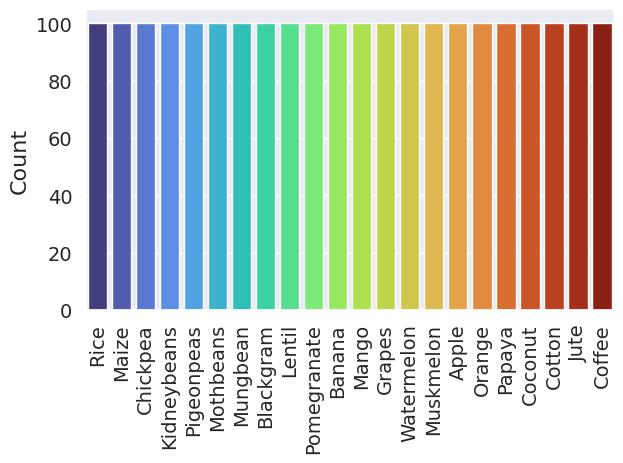

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8))
sns.countplot(df, x='Crop', hue='Crop', palette='turbo', ax=ax)
ax.set_ylabel('Count', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='x', rotation=90)
ax.xaxis.label.set_visible(False)
fig.tight_layout()

In [9]:
corr=df.corr(numeric_only=True)
corr

,N,P,K,Temperature,Humidity,pH,Rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


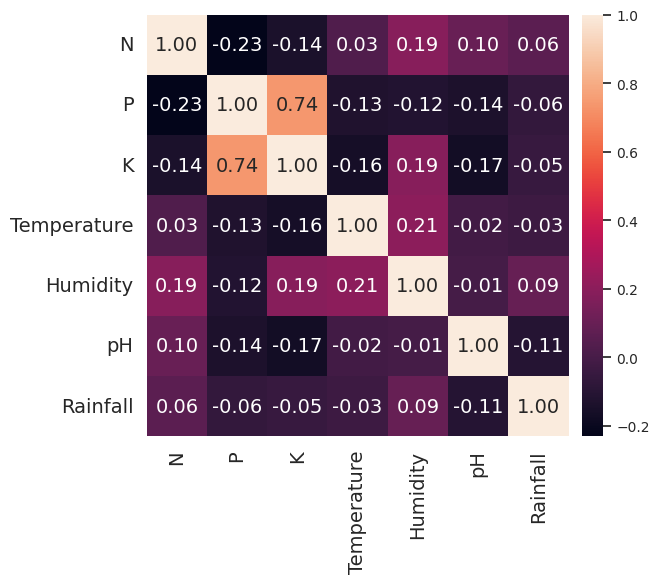

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, cbar=True, fmt=".2f", annot_kws={"fontsize": 14}, cbar_kws={'pad': 0.02}, ax=ax)
ax.set_aspect('equal')
ax.tick_params(axis='both', which='major', labelsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig.tight_layout()

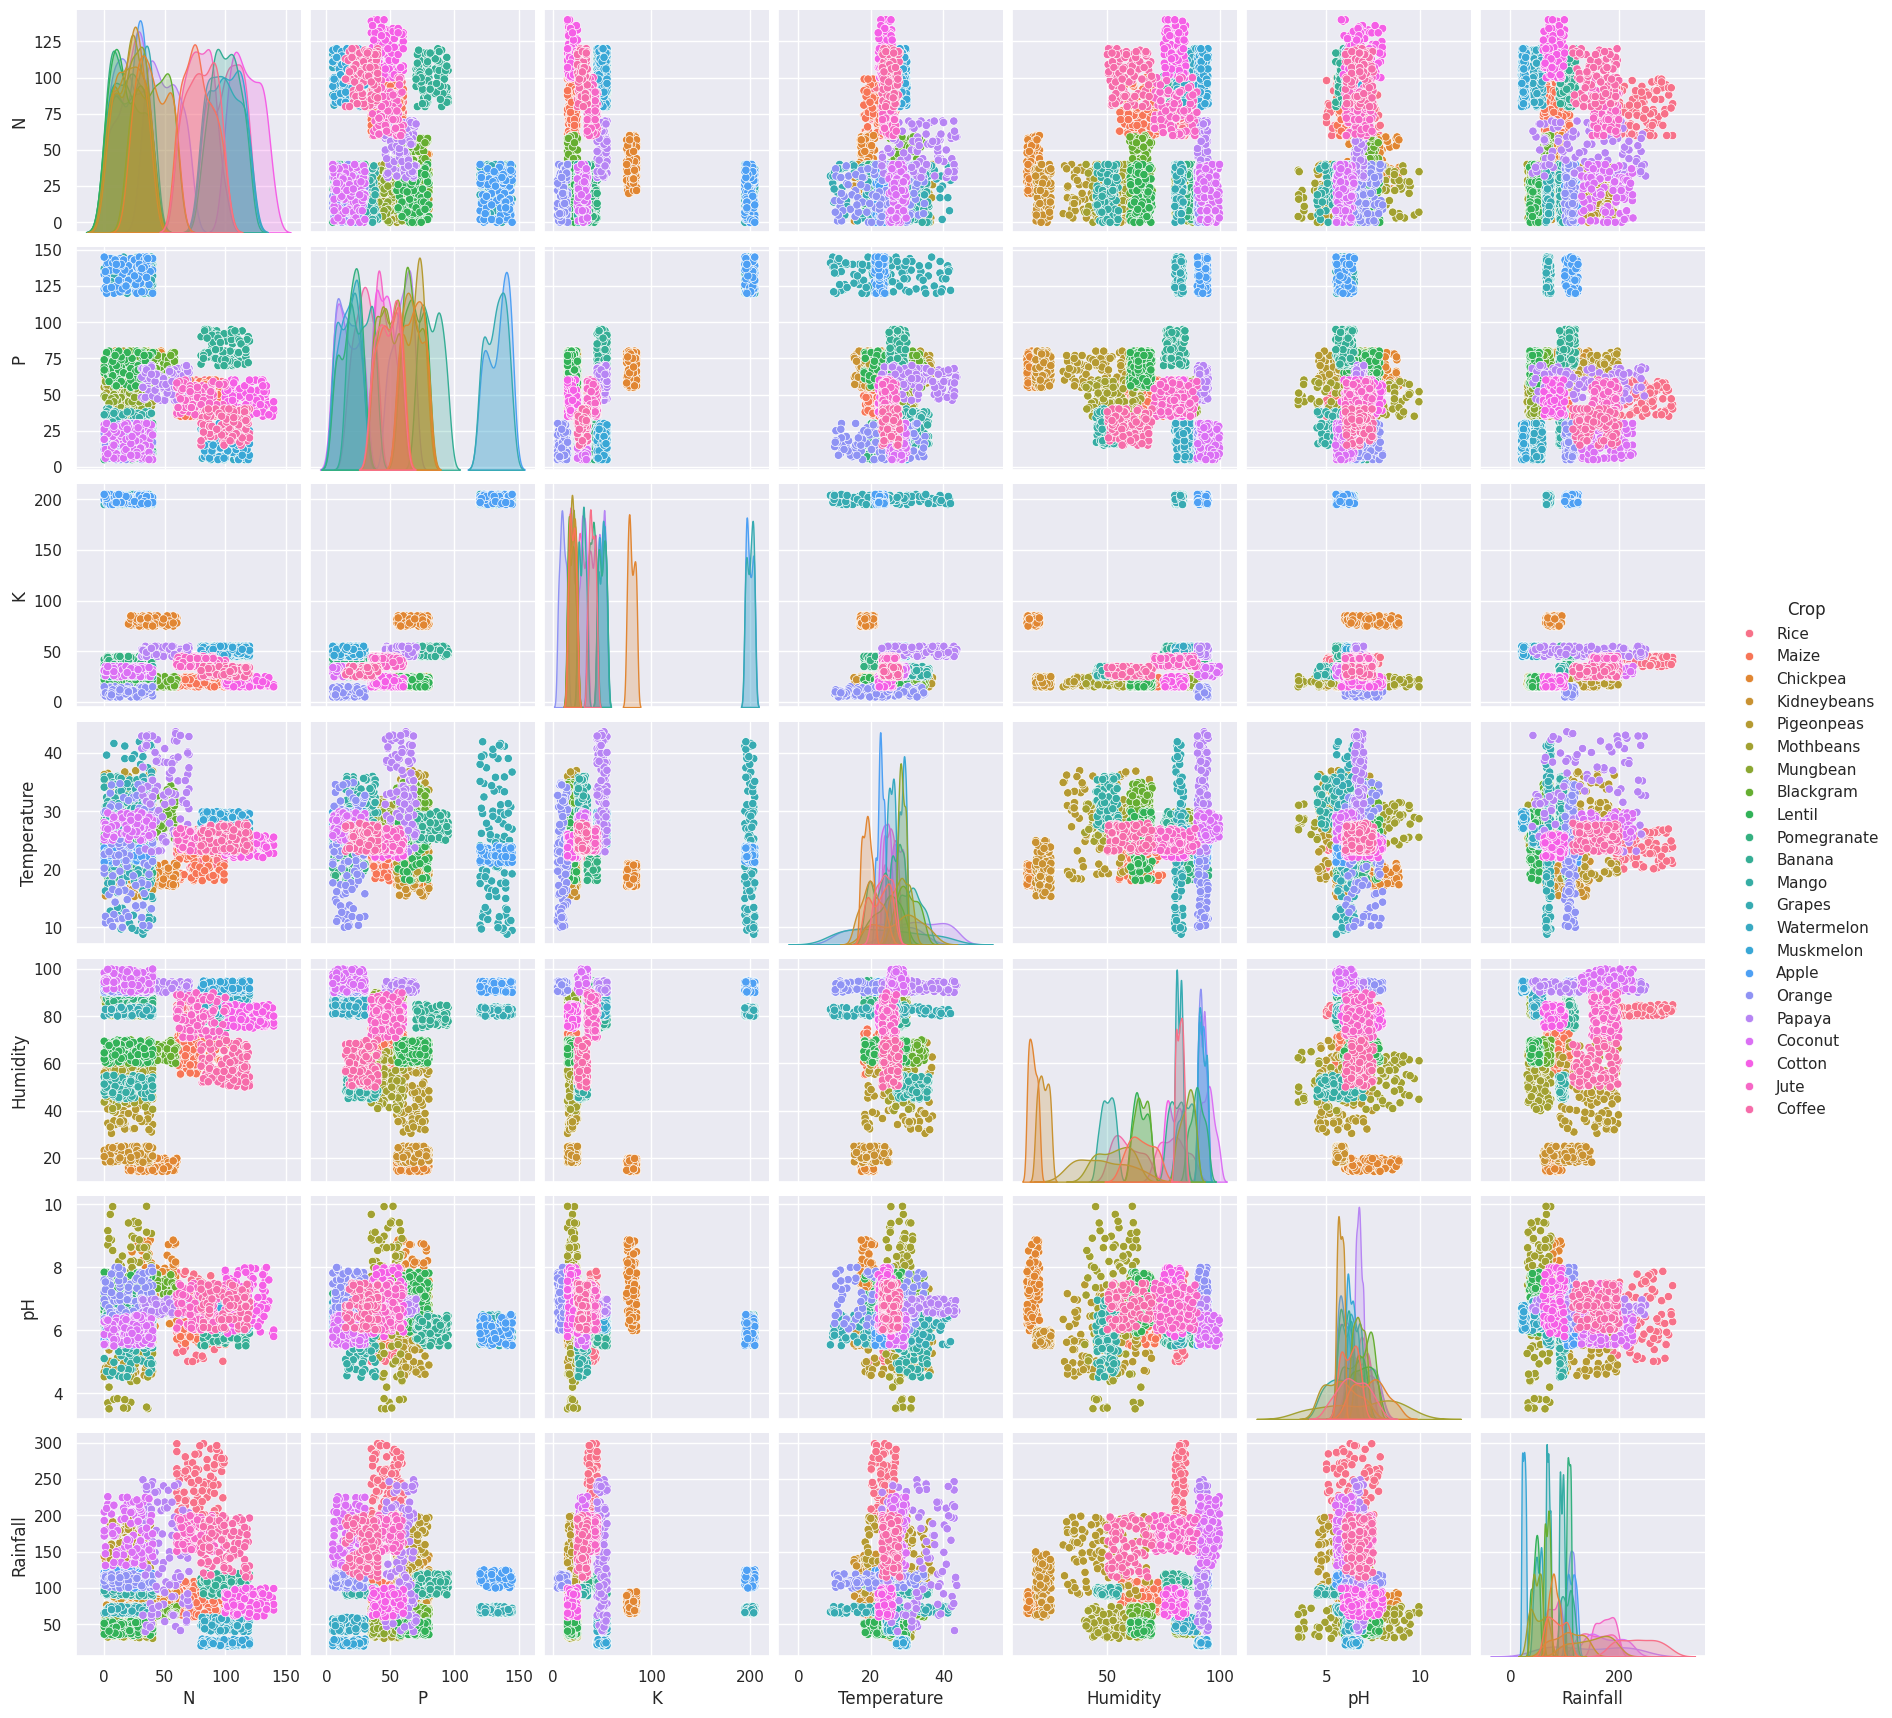

In [11]:
sns.pairplot(df, hue="Crop")